In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("E:/Top Mentor/Datasets/Mall_Customers_Survey.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
### Wants to understand the different customer segments based on Annual Income and Spending Score

In [4]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


####  Modelling

In [5]:
from sklearn.cluster import KMeans

In [6]:
k = KMeans(n_clusters=5)  #### Randomly chosen 5 clusters 

In [7]:
kfit = k.fit(X)

In [8]:
K_Cal = kfit.predict(X)

In [9]:
K_Cal

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [10]:
df1 = pd.DataFrame({'Annual Income (k$)':df['Annual Income (k$)'],'Spending Score (1-100)':df['Spending Score (1-100)'],'Cluster':K_Cal})

In [11]:
df1

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2
...,...,...,...
195,120,79,3
196,126,28,1
197,126,74,3
198,137,18,1


In [12]:
import seaborn as sns

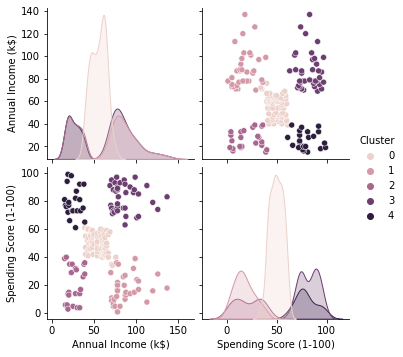

In [13]:
sns.pairplot(df1,hue = 'Cluster', vars = ['Annual Income (k$)','Spending Score (1-100)'])

In [26]:
df1[df1.Cluster ==2]

,Annual Income (k$),Spending Score (1-100),Cluster
123,69,91,2
125,70,77,2
127,71,95,2
129,71,75,2
131,71,75,2
133,72,71,2
135,73,88,2
137,73,73,2
139,74,72,2
141,75,93,2


In [27]:
#### How will you choose the number of Clusters - Elbow Method

In [14]:
### Measure of variability of the observation of each cluster. As the observation increases
### the sum of sqaures becomes larger.
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i,random_state= 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)   ### Sum of within the clusters

C:\Users\PROYAS BOSE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'WCSS')

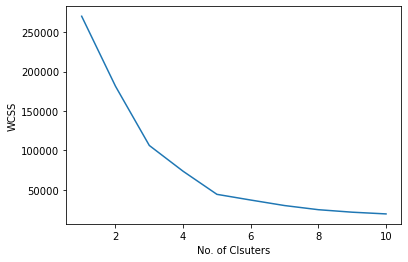

In [16]:
plt.plot(range(1,11),wcss)
plt.xlabel('No. of Clsuters')
plt.ylabel('WCSS')

In [17]:
from sklearn.metrics import silhouette_score   #### It gives you the accuracy and the homeginity of the cluster

In [18]:
silhouette_score(X,k.labels_,)*100   ### Around 50 % is quite good enough for the cluster accuracy

55.3931997444648

In [43]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [52]:
import scipy.cluster.hierarchy as sch

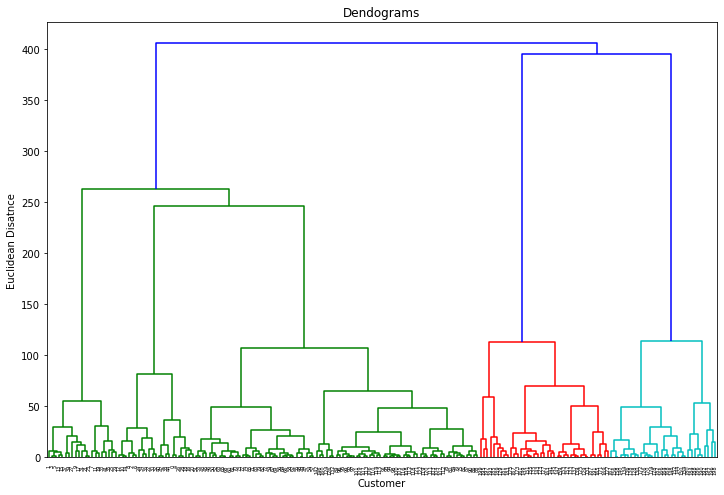

In [57]:
plt.figure(figsize = (12,8))
dendogram = sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.title('Dendograms')
plt.xlabel('Customer')
plt.ylabel('Euclidean Disatnce')
plt.show()

In [58]:
from sklearn.cluster import AgglomerativeClustering

In [59]:
hc = AgglomerativeClustering(n_clusters=5)  ### Elbow method
y_hc = hc.fit_predict(X)

In [60]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [15]:
df2 = pd.DataFrame({'Cluster':K_Cal})
df2

,Cluster
0,0
1,4
2,0
3,4
4,0
...,...
195,1
196,3
197,1
198,3


In [12]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [21]:
#new_df = pd.concat([df,df2],axis = 1)
new_df.to_csv("E:/Customer_Segmentation.csv")    #### writing the Csv